In [1]:
import os

import numpy as np
import pandas as pd
import astropy
from astropy.stats import LombScargle
import astroML
from astroML.time_series import lomb_scargle, lomb_scargle_BIC, lomb_scargle_bootstrap
import matplotlib.pyplot as plt
from matplotlib import rcParams, gridspec
import seaborn as sns

%matplotlib inline

# Analyze photometry for APF-50 sample, and look for evidence of rotation or other short-timescale activity.

## Load photometry for one star, inspect.

In [2]:
dirs = ['APF-APT-50', 'APF-APT-50.2', 'APF-APT-50.3', 'APF-APT-50.4']
#phot = pd.read_csv(dirs[0]+'/hd1461/d-ac.by', sep='  ', 
#                   names=['time', 'flux'], header=None)
#phot = pd.read_csv(dirs[3]+'/hd164922/d-ab.by', sep='  ', 
#                   names=['time', 'flux'], header=None)
phot = pd.read_csv(dirs[3]+'/hd201092/d-ab.by', sep='  ', 
                   names=['time', 'flux'], header=None)

/Users/lee/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  import sys


In [3]:
phot

,time,flux
0,52895.8549,-0.80170
1,52896.7786,-0.80145
2,52897.7827,-0.80130
3,52898.7778,-0.80220
4,52899.7768,-0.80120
5,52900.7767,-0.80195
6,52901.7739,-0.80145
7,52903.7729,-0.80185
8,52904.7720,-0.80335
9,52908.7573,-0.80175


In [4]:
np.std(phot.flux)

0.0024261732508809976

In [5]:
omega = 2*np.pi*np.linspace(0.0001, 0.5, 100000)
err = 0.00005*np.ones(len(phot))
L = lomb_scargle(phot.time, phot.flux, err, omega, generalized=True)

        Use astropy.stats.LombScargle instead. [__main__]


In [6]:
L

array([0.00068828, 0.00069104, 0.00069375, ..., 0.00139744, 0.00126902,
       0.00112085])

Text(0, 0.5, 'Power')

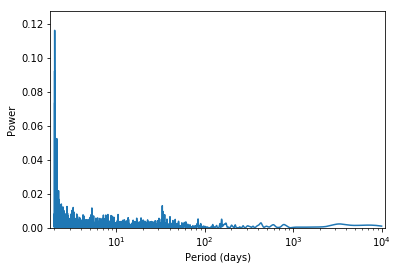

In [7]:
pers = 2*np.pi/omega
fig, ax = plt.subplots()
ax.plot(pers, np.flip(L))
ax.set_xlim([0.9*pers[-1], 1.1*pers[0]])
ax.set_ylim([0, 1.1*np.amax(L)])
ax.set_xscale('log')
ax.set_xlabel('Period (days)')
ax.set_ylabel('Power')

Text(0, 0.5, 'Flux')

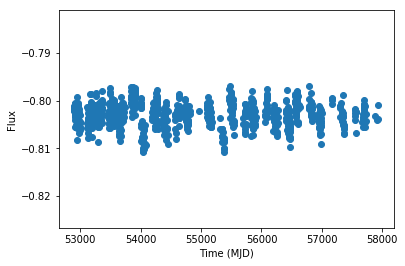

In [8]:
fig, ax = plt.subplots()
ax.scatter(phot['time'], phot['flux'])
ax.set_xlabel('Time (MJD)')
ax.set_ylabel('Flux')
#ax.set_xlim([600, 725])

## Split up photometry into distinct epochs, if there are such epochs.

Text(0, 0.5, 'Time')

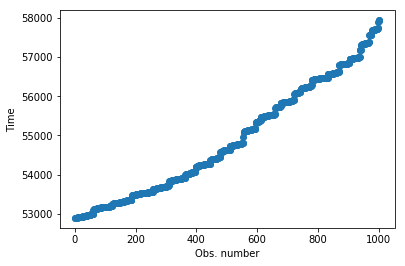

In [9]:
fig, ax = plt.subplots()
ax.scatter(np.arange(len(phot)), phot['time'])
ax.set_xlabel('Obs. number')
ax.set_ylabel('Time')
#ax.set_xlim([600, 725])

In [10]:
len(phot)/13.

77.15384615384616

In [11]:
phot_sub = phot.loc[phot.time < 54500]
err_sub = 0.00005*np.ones(len(phot_sub))
Lsub = lomb_scargle(phot_sub.time, phot_sub.flux, err_sub, omega, generalized=True)

        Use astropy.stats.LombScargle instead. [__main__]


Text(0, 0.5, 'Power')

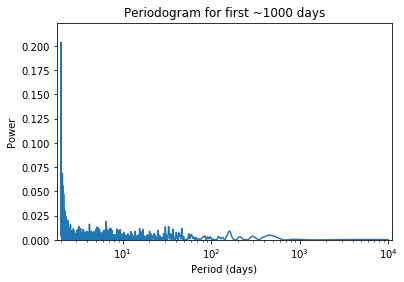

In [12]:
pers = 2*np.pi/omega
fig, ax = plt.subplots()
ax.set_title('Periodogram for first ~1000 days')
ax.plot(pers, np.flip(Lsub))
ax.set_xlim([0.9*pers[-1], 1.1*pers[0]])
ax.set_ylim([0, 1.1*np.amax(Lsub)])
ax.set_xscale('log')
ax.set_xlabel('Period (days)')
ax.set_ylabel('Power')

In [13]:
def index_marks(nrows, chunk_size):
    return range(1 * chunk_size, (nrows // chunk_size + 1) * chunk_size, chunk_size)

def split(df, chunk_size):
    indices = index_marks(df.shape[0], chunk_size)
    return np.split(df, indices)

# Return an array of dataframes, each with ~100 photometric measurements.
#subphots = split(phot, 190) # Optimal split size, but ~3 years per split.
subphots = split(phot, 200)

In [14]:
# Compute the time baseline of each photometry split (one will be slightly off, but err long).
baseline = np.amax(subphots[0]['time']) - np.amin(subphots[0]['time'])
suboms = 2*np.pi*np.linspace(2./baseline, 0.5, 100000)# Go to half the baseline.
subpers = 2*np.pi/suboms
# Make empty list, to be populated with LS periodograms of each photometry split.
Lsubs = []
for subphot in subphots:
    suberr = 0.00005*np.ones(len(subphot))
    L = lomb_scargle(subphot.time, subphot.flux, suberr, suboms, generalized=True)
    Lsubs.append(L)

        Use astropy.stats.LombScargle instead. [__main__]


## Make a GridSpec plot of the periodogram for each photometry split.

In [15]:
# Figure out the right way to arrange the plots in a grid.
num = len(Lsubs)
grid = np.arange(num)
if np.remainder(num, 4) == 0:
    grid = np.reshape(grid, (4, int(num/4)))
if np.remainder(num, 3) == 0:
    grid = np.reshape(grid, (3, int(num/3)))
elif np.remainder(num, 2) == 0:
    grid = np.reshape(grid, (2, int(num/2)))
else:
    pass

gridrep = np.copy(grid)
for i in np.arange(1, len(grid)):
    gridrep[i] = grid[0]

(3, 2)


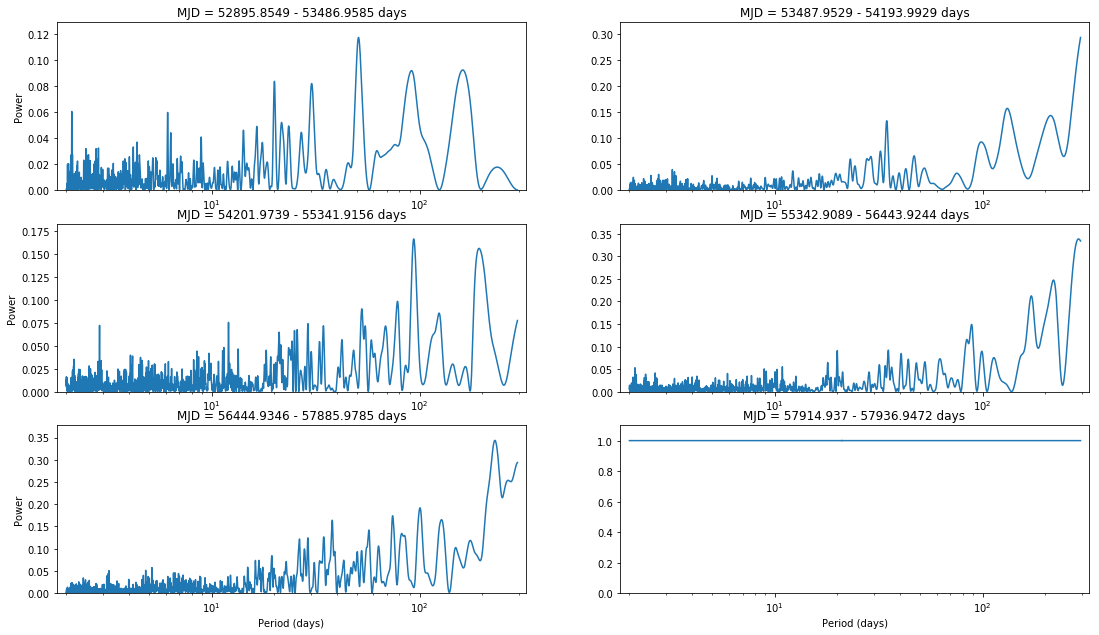

In [18]:
print(grid.shape)
axes = []

fig = plt.figure()
#plt.title('HD 201092\n')
fig.set_size_inches(18.5, 10.5)
spec = gridspec.GridSpec(nrows=grid.shape[0], ncols=grid.shape[1], figure=fig)
for i in np.arange(grid.shape[0]):
    for j in np.arange(grid.shape[1]):
        ax = fig.add_subplot(spec[i, j])
        split = grid[i,0] + j
        
        ax.plot(subpers, Lsubs[split])
        ax.set_title('MJD = {} - {} days'.format(np.asarray(subphots[split].time)[0], 
                                                 np.asarray(subphots[split].time)[-1]))
        ax.set_xlim([0.9*subpers[-1], 1.1*subpers[0]])
        ax.set_ylim([0, 1.1*np.amax(Lsubs[split])])
        ax.set_xscale('log')
        if i == grid.shape[1]:
            ax.set_xlabel('Period (days)')
        if j == 0:
            ax.set_ylabel('Power')
        axes.append(ax)

## Adapt the eFAP algorithm from BJ / Lea / RVSearch.

In [158]:
def eFAP(power, num_pers, fap=0.001):
    """Calculate the threshold for significance based on BJ's empirical
        false-alarm-probability algorithm, and estimate the
        false-alarm-probability of the DBIC global maximum.

    """
    # select out intermediate values of BIC, median - 95%
    spower = np.sort(power)
    crop_power = spower[int(0.5*len(spower)):int(0.95*len(spower))]

    hist, edge = np.histogram(crop_power, bins=10)
    cent = (edge[1:]+edge[:-1])/2.
    norm = float(np.sum(hist))
    nhist = hist/norm
    loghist = np.log10(nhist)

    func = np.poly1d(np.polyfit(cent[np.isfinite(loghist)], \
                            loghist[np.isfinite(loghist)], 1))
    xmod = np.linspace(np.min(spower[np.isfinite(spower)]), \
                                10.*np.max(spower), 10000)
    lfit = 10.**func(xmod)
    fap_min = 10.**func(spower[-1])*num_pers
    thresh = xmod[np.where(np.abs(lfit-fap/num_pers) ==
                    np.min(np.abs(lfit-fap/num_pers)))]
    power_thresh = thresh[0]
    # Save the empirical-FAP of the DBIC global maximum.
    return power_thresh, fap_min